<a href="https://colab.research.google.com/github/ChungYuanHsu/Python-and-ML_homework/blob/master/HWQ_20190426.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **HWQ <font color=FC8600> 調整參數使神經網路準確率>90% </font> **



In [5]:
%env KERAS_BACKEND=tensorflow
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

env: KERAS_BACKEND=tensorflow


### <font color=1681F2> 載入MNIST數據 </font>

In [0]:
from keras.datasets import mnist

In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [8]:
len(x_train),len(x_test)

(60000, 10000)

In [0]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

### <font color=1681F2> 將input data正規化 </font>

In [0]:
x_train = (x_train - x_train.min())/(x_train.max() - x_train.min())
x_test = (x_test - x_test.min())/(x_test.max() - x_test.min())

In [11]:
x_train.max(),x_train.min()

(1.0, 0.0)

### <font color=1681F2> 將output data 轉成10個元素的矩陣 </font>

In [0]:
from keras.utils import np_utils

In [0]:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [14]:
y_train[1234] 

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

### <font color=1681F2> 建立神經網路模型(3層hidden layers 分別有50,30,20個神經元,激發函數選擇 ReLU) </font>

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

In [0]:
model = Sequential()
model.add(Dense(50,input_dim = 784))
model.add(Activation('relu'))
model.add(Dense(30))
model.add(Activation('relu'))
model.add(Dense(20))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))


In [0]:
model.compile(loss='mse', optimizer=SGD(lr=0.05), metrics=['accuracy'])

In [51]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 50)                39250     
_________________________________________________________________
activation_21 (Activation)   (None, 50)                0         
_________________________________________________________________
dense_23 (Dense)             (None, 30)                1530      
_________________________________________________________________
activation_22 (Activation)   (None, 30)                0         
_________________________________________________________________
dense_24 (Dense)             (None, 20)                620       
_________________________________________________________________
activation_23 (Activation)   (None, 20)                0         
_________________________________________________________________
dense_25 (Dense)             (None, 10)                210       
__________

### <font color=1681F2> 開始訓練模型 </font>

In [54]:
model_1 = model.fit(x_train,y_train,batch_size = 20,epochs = 10)

Epoch 1/10
60000/60000 [==============================] - 8s 128us/step - loss: 0.0088 - acc: 0.9435
Epoch 2/10
60000/60000 [==============================] - 9s 142us/step - loss: 0.0085 - acc: 0.9457
Epoch 3/10
60000/60000 [==============================] - 8s 133us/step - loss: 0.0081 - acc: 0.9483
Epoch 4/10
60000/60000 [==============================] - 8s 128us/step - loss: 0.0078 - acc: 0.9507
Epoch 5/10
60000/60000 [==============================] - 8s 129us/step - loss: 0.0075 - acc: 0.9527
Epoch 6/10
60000/60000 [==============================] - 8s 128us/step - loss: 0.0072 - acc: 0.9547
Epoch 7/10
60000/60000 [==============================] - 8s 127us/step - loss: 0.0070 - acc: 0.9568
Epoch 8/10
60000/60000 [==============================] - 8s 128us/step - loss: 0.0067 - acc: 0.9578
Epoch 9/10
60000/60000 [==============================] - 8s 127us/step - loss: 0.0065 - acc: 0.9597
Epoch 10/10
60000/60000 [==============================] - 8s 127us/step - loss: 0.0063 - a

In [55]:
predict = model.predict_classes(x_test)
predict

array([7, 2, 1, ..., 4, 5, 6])

In [0]:
def test(測試編號):
    plt.imshow(x_test[測試編號].reshape(28,28), cmap='Greys')
    print('神經網路判斷為:', predict[測試編號])

神經網路判斷為: 7


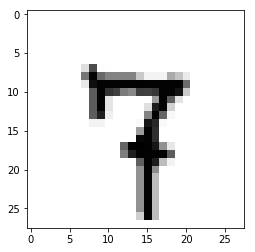

In [59]:
test(987)

### <font color=1681F2> 準確率可達95.37% </font>

In [60]:
score = model.evaluate(x_test, y_test)
print('loss:', score[0])
print('正確率', score[1])

10000/10000 [==============================] - 0s 39us/step
loss: 0.006965179997414816
正確率 0.9537
